In [1]:
# %%
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# Function to create train and validation generators
def create_generators(train_data_dir, valid_data_dir, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
horizontal_flip=True
    )

    valid_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(255, 255),
        batch_size=batch_size,
        class_mode='binary'
    )

    validation_generator = valid_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(255, 255),
        batch_size=batch_size,
        class_mode='binary'
    )

    return train_generator, validation_generator

In [3]:
# Define directories for training and validation data
train_data_dir = "archive (5)/Acne/Train"
valid_data_dir = "archive (5)/Acne/Validation"

In [4]:
# Create data generators
batch_size = 100
train_generator, validation_generator = create_generators(train_data_dir, valid_data_dir, batch_size)

Found 7829 images belonging to 2 classes.
Found 676 images belonging to 2 classes.


In [10]:
# %%
# Define MobileNet without including the top layer
input_shape = (255, 255, 3)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24308\2649944320.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)


In [15]:
# %%
# Freeze MobileNet layers
for layer in base_model.layers:
    layer.trainable = False

In [16]:
# %%
# Build your model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
model.load_weights('model.keras')

ValueError: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_2, built=False>:

Layer 'dense_2' was never built and thus it doesn't have any variables. However the weights file lists 2 variables for this layer.
In most cases, this error indicates that either:

1. The layer is owned by a parent layer that implements a `build()` method, but calling the parent's `build()` method did NOT create the state of the child layer 'dense_2'. A `build()` method must create ALL state for the layer, including the state of any children layers.

2. You need to implement the `def build_from_config(self, config)` method on layer 'dense_2', to specify how to rebuild it during loading. In this case, you might also want to implement the method that generates the build config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the layer (i.e. its variables) upon deserialization.

List of objects that could not be loaded:
[<Dense name=dense_2, built=False>, <Dense name=dense_3, built=False>]

In [14]:
# %%
# Train the model
history = model.fit(train_generator,
                    epochs=1)

KeyboardInterrupt: 

In [17]:
# Evaluate the model
true_classes = validation_generator.classes
predicted_classes = model.predict(validation_generator).flatten().round()


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [28]:

# %%
true_classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
# %%
predicted_classes

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1.

In [30]:
# %%
# Calculate evaluation metrics
precision, recall, f1_score, support = precision_recall_fscore_support(
    true_classes, predicted_classes, average='binary'
)

In [31]:
accuracy = accuracy_score(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

In [32]:
# Print evaluation metrics
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(conf_matrix)

Precision: 0.5643086816720257
Recall: 0.9140625
F1-Score: 0.6978131212723658
Accuracy: 0.5502958579881657
Confusion Matrix:
[[ 21 271]
 [ 33 351]]


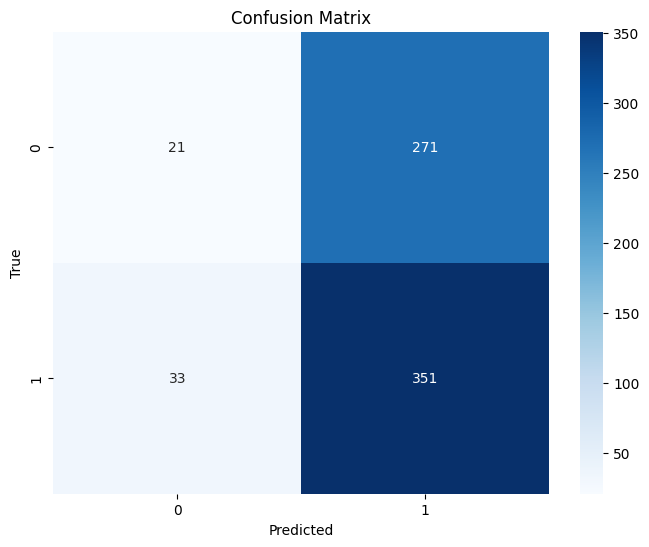

In [33]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import cv2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
No Acne


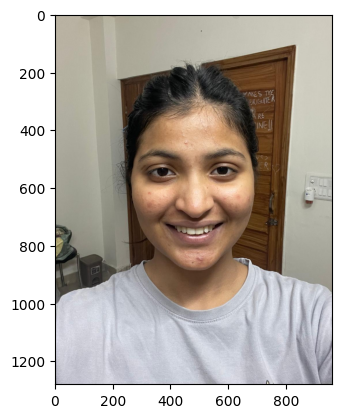

In [22]:
image = cv2.imread("real dataset.jpg")
frame = cv2.resize(image, (255, 255))
frame = frame / 255.0
frame = frame.reshape((1,255,255,3))
prediction = model.predict(frame)
prediction_label = "Acne" if prediction < 0.5 else "No Acne"

print(prediction_label)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# cv2.destroyAllWindows()

In [20]:
cap = cv2.VideoCapture(0)
while True:
    #Capture frame-by-frame
    ret, image = cap.read()

    # Preprocess the frame to match the model input shape
    frame = cv2.resize(image, (255, 255))
    frame = frame / 255.0  # Normalize pixel values
    frame = frame.reshape((1, 255, 255, 3))  # Reshape for model input

    # Make predictions
    prediction = model.predict(frame)
    prediction_label = "Acne" if prediction < 0.5 else "No Acne"
    
    print(prediction_label)
    # Display the captured frame
    cv2.imshow('Webcam', image)

    # Press 'q' to quit the webcam
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
No Acne
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/s

In [40]:
cap.release()
cv2.destroyAllWindows()

In [41]:
frame = cv2.imread('real_dataset')

In [26]:
model.save('model.keras')